In [78]:
import matplotlib.pyplot as plt
from pylab import rcParams

import networkx as nx
import scipy.io

import numpy as np
import scipy as sc

# Graph Signal Processing Intro

Given an undirected, connected (and weighted) Graph $\mathcal G=\{\mathcal V, \textbf W or \textbf A\}$, where

$\mathcal V$ denotes a finite set of vertices with $|\mathcal V| = N$, 

and a (weighted) adjacency matrix $\textbf A$ ($\textbf W$) containing connections between vertices.

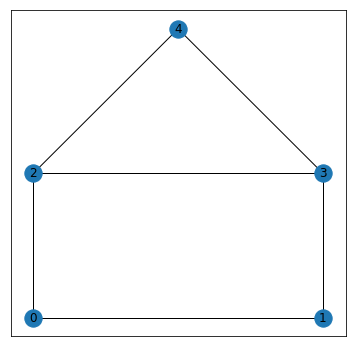

In [79]:
# toy example
G = nx.house_graph()
pos = {0: (0, 0),
       1: (1, 0),
       2: (0, 1),
       3: (1, 1),
       4: (0.5, 2.0)}

rcParams['figure.figsize'] = 6, 6
nx.draw_networkx(G, pos)

### Adjacency matrix $A$
If $a_i$ and $a_j$ are connected: 

$A_{ij}=1$ or $A_{ij}=w_{ij}$

otherwise

$A_{ij}=0$

In [85]:
A = nx.adjacency_matrix(G).todense()
A

matrix([[0, 1, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 0, 0, 1, 1],
        [0, 1, 1, 0, 1],
        [0, 0, 1, 1, 0]], dtype=int64)

### Degree matrix $D$

$d_i=\sum_{j=0}^{n-1} A_{ij}$ - the number of edges incident to $d_i$ or if weighted, the sum of edge weights

$D = diag(d_0, d_1, ..., d_{n-1})$

In [86]:
d = np.sum(A, axis=0)
d

matrix([[2, 2, 3, 3, 2]], dtype=int64)

In [87]:
D = np.diagflat(d)
D

matrix([[2, 0, 0, 0, 0],
        [0, 2, 0, 0, 0],
        [0, 0, 3, 0, 0],
        [0, 0, 0, 3, 0],
        [0, 0, 0, 0, 2]], dtype=int64)

In [88]:
# laplacian
L = D - A
L

matrix([[ 2, -1, -1,  0,  0],
        [-1,  2,  0, -1,  0],
        [-1,  0,  3, -1, -1],
        [ 0, -1, -1,  3, -1],
        [ 0,  0, -1, -1,  2]], dtype=int64)

### Real-world example
#### Minnesota road network

In [89]:
mat = scipy.io.loadmat('data/minnesota.mat')

In [61]:
# Adjacency matrix
A = mat['A']
A

<2642x2642 sparse matrix of type '<class 'numpy.float64'>'
	with 6606 stored elements in Compressed Sparse Column format>

In [62]:
# Node attributes
features = mat['xy']
features

array([[-97.207,  49.001],
       [-96.801,  49.   ],
       [-95.957,  49.   ],
       ...,
       [-93.247,  43.5  ],
       [-93.353,  43.5  ],
       [-93.493,  43.499]])

In [63]:
G = nx.from_scipy_sparse_matrix(A)

In [64]:
def plot_graph(G, pos, vals=None, cmap=None, node_size=8):
    rcParams['figure.figsize'] = 8, 8
    if vals is not None:
        nx.draw(G, pos, node_color=vals, cmap=cmap, vmin=vals.min(), vmax=vals.max(), node_size=node_size)
    else:
        nx.draw(G, pos, node_size=node_size)
        
    plt.show()

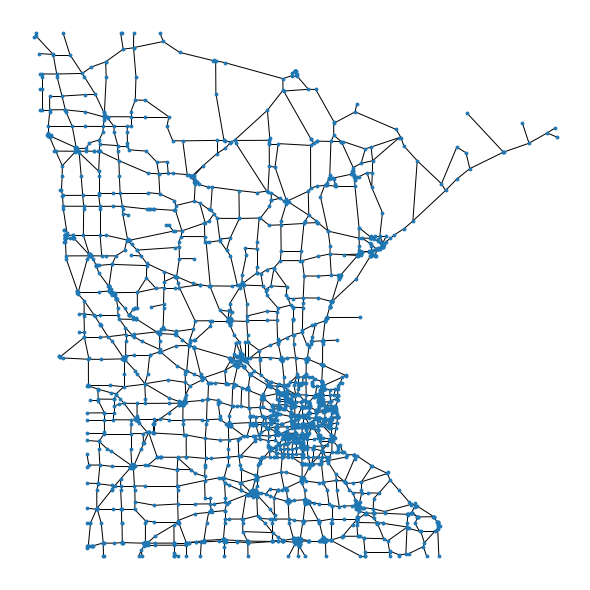

In [65]:
plot_graph(G, features)

### Sparsity of the adjacency matrix $A$

In [66]:
def show_sparsity(mat):
    rcParams['figure.figsize'] = 20, 20

    fig = plt.figure()
    ax1 = fig.add_subplot(221)

    ax1.spy(mat, precision=0.1, markersize=1)
    plt.show()

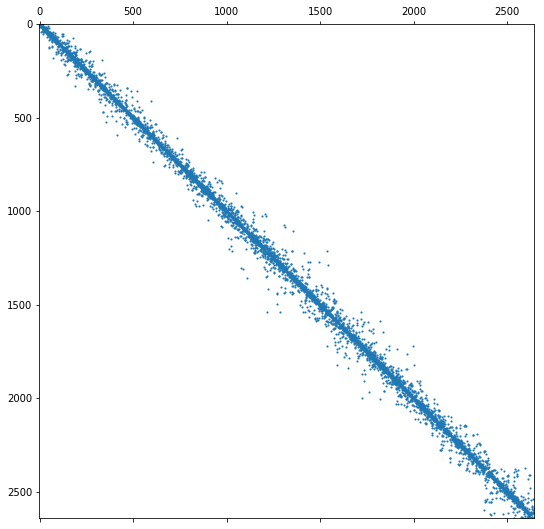

In [67]:
show_sparsity(A)

## Fourier transform

Fourier Basis...

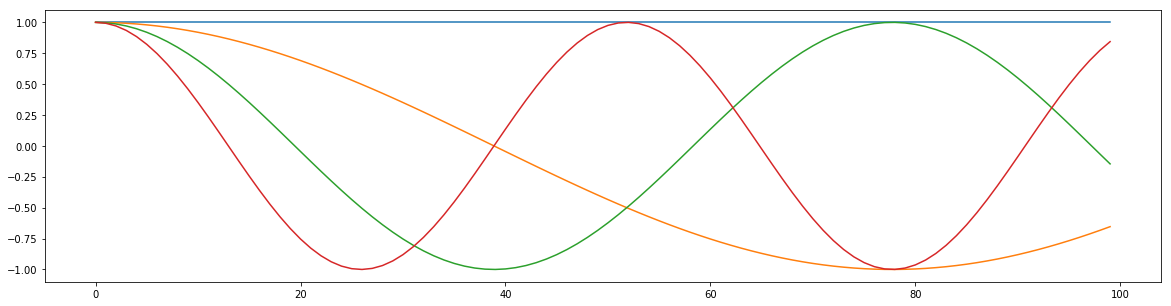

In [90]:
freqs = range(4)

bases = lambda x, k: np.cos(k * x / np.pi)

rcParams['figure.figsize'] = 20, 5
for k in freqs:
    plt.plot(bases(np.linspace(0, 4*np.pi, 100), k))

# todo add 

plt.show()
plt.close()


## Signals on a Graph


$x:\mathcal V \rightarrow \mathbb R$

Which can be represented as a vector $x \in \mathbb R^n$ where $x_i$ is the value of the $x$ at the $i^{th}$ node.

### Graph laplacian

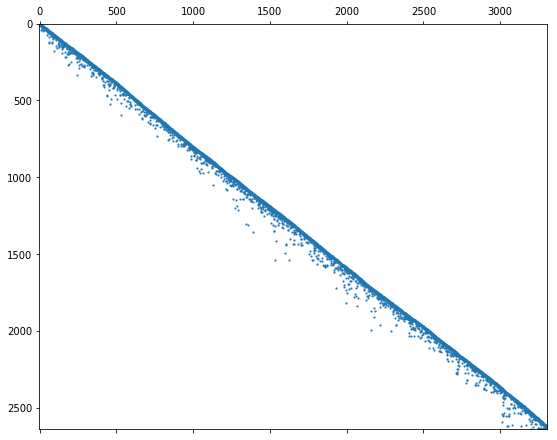

In [68]:
D = nx.incidence_matrix(G, oriented=True)
show_sparsity(D)
D=D*D.T

In [69]:
L = nx.linalg.laplacian_matrix(G, weight=None).astype(np.float)

In [70]:
L2 = (D - A).astype(np.float)

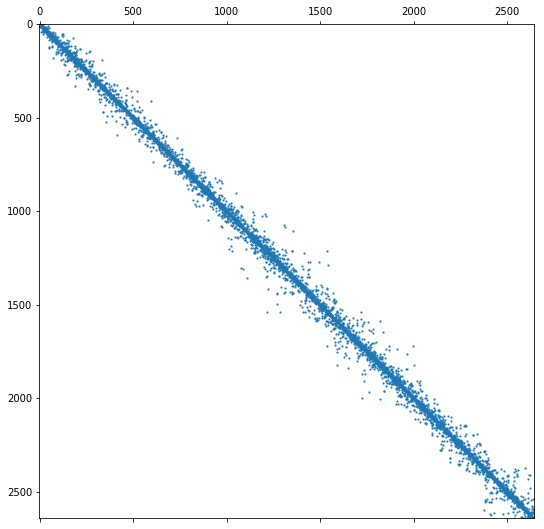

In [71]:
show_sparsity(L2)

In [52]:
# parallel with R

# Fourier Transform

## Eigenvalue decomposition

$L$ is symmetric -> n orthonormal bases.

$L$ is semi-positive definite -> non-negative eigenvalues

In [72]:
!pip install block_timer
from block_timer.timer import Timer

In [73]:
# Sparse (Hermatian) computation, first K
with Timer('Sparse Hermatian'):
    theta, U = sc.sparse.linalg.eigsh(L, k=8, which='SM')
theta

[Sparse Hermatian] Total time 0.48254 seconds.


array([1.58668111e-16, 3.15403000e-16, 8.44938594e-04, 2.07732544e-03,
       2.26491116e-03, 3.13178171e-03, 5.05011237e-03, 5.47885724e-03])

In [ ]:
# Sparse (Hermatian) computation, not all possible
with Timer('Sparse Hermatian'):
    theta, U = sc.sparse.linalg.eigsh(L, k=L.shape[0]-1)
theta

In [ ]:
# Sparse computation, not all possible
with Timer('Sparse'):
    theta, U = sc.sparse.linalg.eigs(L, k=L.shape[0]-2)
theta

In [ ]:
# Dense computation
with Timer('Dense'):
    theta, U = sc.linalg.eig(L.toarray())
theta

In [ ]:
# Dense (Hermatian) computation
with Timer('Dense Hermatian'):
    theta_full, U_full = sc.linalg.eigh(L.toarray())
theta_full

## $U$ is not sparse

In [ ]:
#plt.matshow(U_full)
show_sparsity(U_full)

### Eigen values

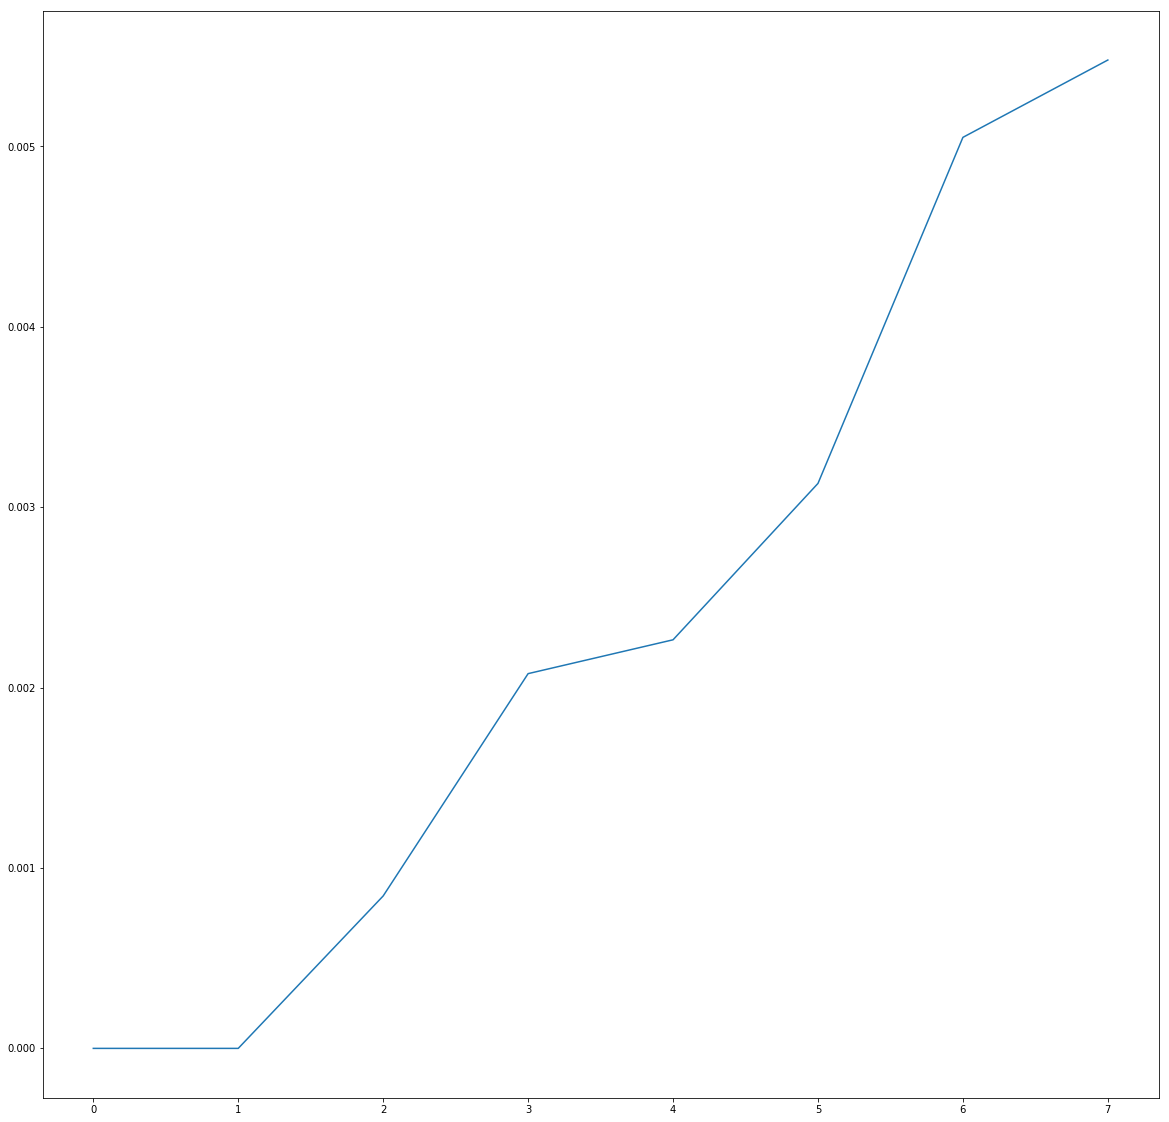

In [75]:
plt.plot(theta)
plt.show()

In [76]:
import seaborn as sns
# heatmap = plt.cm.get_cmap('hot')
heatmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

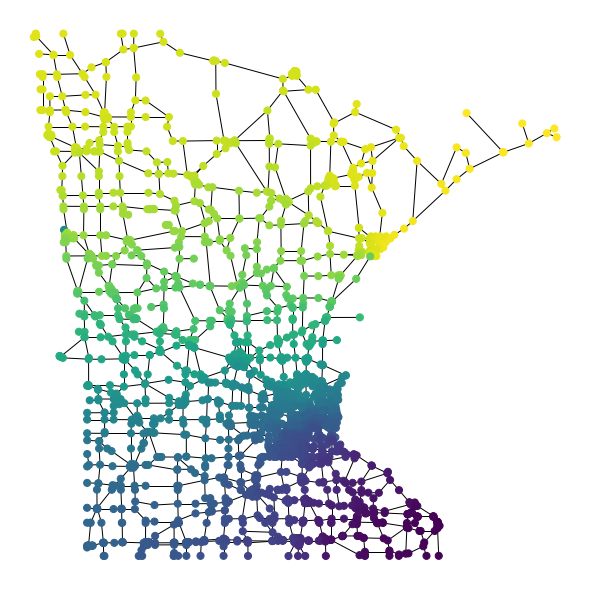

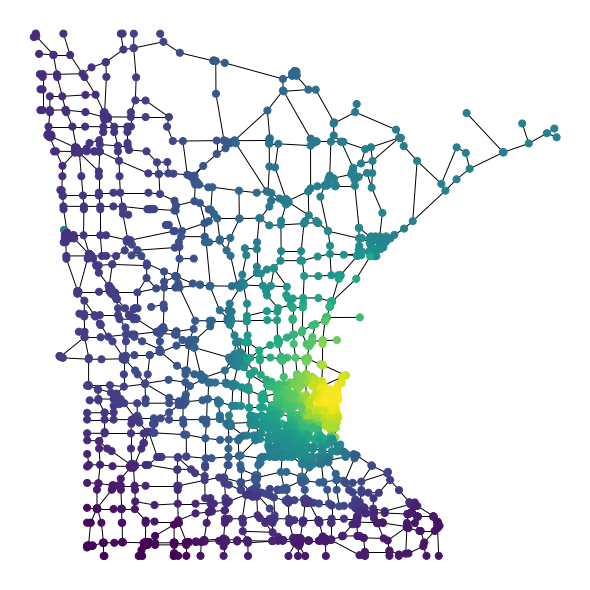

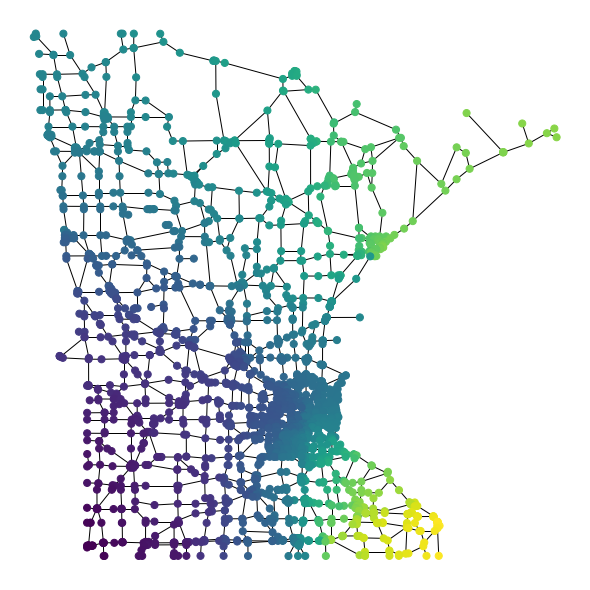

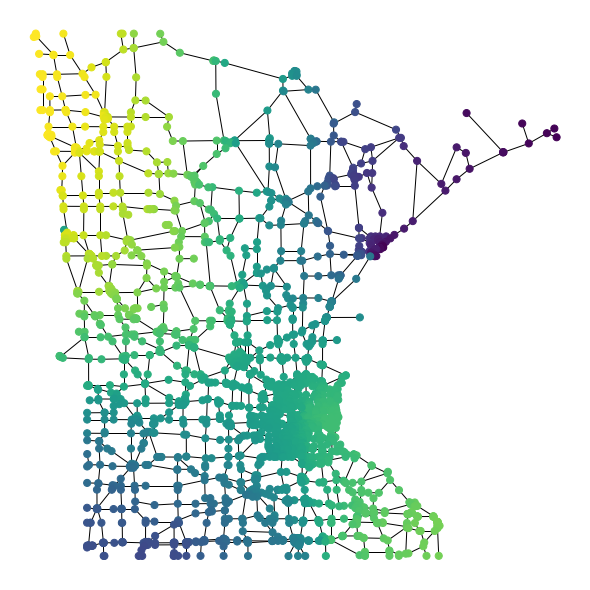

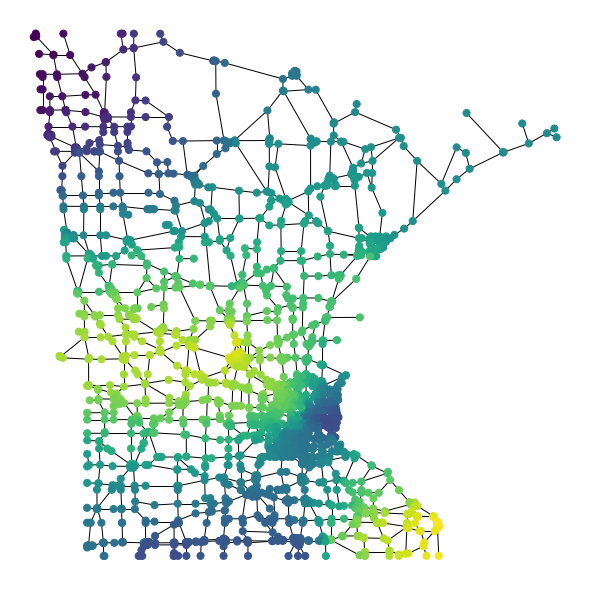

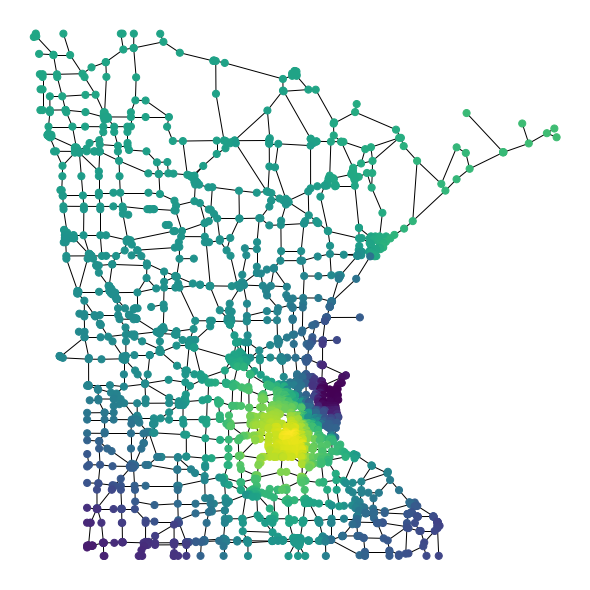

In [77]:
# fixme not ordered!!
for i in range(2,8):
    plot_graph(G, features, U[:, i], None, 50)
    plt.close()

## Fourier transform
The Laplacian is diagonalized by the Fourier basis $U \in \mathbb{R}^{n\times n}$

$L=U\Lambda U^T$

$U = [u_0, u_1, ..., u_{n-1}]$ - Orthonormal eigenvectors of $L$

$\Lambda = diag([\lambda_0, \lambda_1, ..., \lambda_{n-1}]) \in \mathbb{R}^{n\times n}$ - Real, non-negative eigenvalues

### Fourier transform from mesh vertices to spectral domain:

#### $x_\omega = U^T x$

Where $x \in \mathbb{R}^{n \times 3}$ is a signal on the graph

## Filtering

$y=g_\theta (L)x$

$g_\theta (L)$ parametric filter with learnable weights $\theta$


# Fast spectral convolutions

## Chebyshev polynomials